<a href="https://colab.research.google.com/github/SithmiDesilva/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-II/Text_Data_Analysis_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the dependencies
import numpy as np  #for computational calculations
import pandas as pd   # for manipulate dataframes
from sklearn.model_selection import train_test_split  # split the dataset into test train data
from sklearn.metrics import accuracy_score  # evaluate the models
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data=pd.read_csv("/content/drive/MyDrive/DSGP/DatasetNew.csv")

##Data Exploration

In [3]:
# First 5 rows of the dataset
data.head()

,public_id,lesion_id,patient_id,localization,larger_size,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age_group,cancer_or_non_cancer
0,0,50,48,Tongue,2.0,Yes,No,No,M,Black,2,Cancer
1,1,50,48,Tongue,2.0,Yes,No,No,M,Black,2,Cancer
2,2,41,39,Tongue,2.5,Yes,Former,Yes,M,White,0,Cancer
3,3,41,39,Tongue,2.5,Yes,Former,Yes,M,White,0,Cancer
4,4,87,81,Lip,1.5,Former,Yes,Yes,F,White,0,Cancer


In [4]:
# Last 5 rows of the dataset
data.tail()

,public_id,lesion_id,patient_id,localization,larger_size,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age_group,cancer_or_non_cancer
2232,2232,92,65,Gingiva,1.8,Former,Former,Yes,F,Asian,1,Non-Cancer
2233,2233,71,31,Buccal mucosa,2.1,Yes,Yes,No,M,Hispanic,0,Cancer
2234,2234,48,87,Cheek,1.8,No,No,Yes,F,Brown,0,Cancer
2235,2235,51,73,Floor of mouth,2.3,No,No,No,M,Brown,2,Non-Cancer
2236,2236,88,92,Cheek,2.5,Yes,Former,No,F,Asian,2,Non-Cancer


In [5]:
# Sanitory check
data.shape

(2237, 12)

In [6]:
# More details about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   public_id             2237 non-null   int64  
 1   lesion_id             2237 non-null   int64  
 2   patient_id            2237 non-null   int64  
 3   localization          2237 non-null   object 
 4   larger_size           2237 non-null   float64
 5   tobacco_use           2237 non-null   object 
 6   alcohol_consumption   2237 non-null   object 
 7   sun_exposure          2237 non-null   object 
 8   gender                2237 non-null   object 
 9   skin_color            2237 non-null   object 
 10  age_group             2237 non-null   int64  
 11  cancer_or_non_cancer  2237 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 209.8+ KB


In [7]:
#Statistical Description
data.describe()

,public_id,lesion_id,patient_id,larger_size,age_group
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1118.000000,62.080912,55.187751,2.176933,1.149307
std,645.910598,26.806605,25.483878,0.959472,0.843297
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.000000,43.000000,36.000000,1.500000,0.000000
50%,1118.000000,62.000000,52.000000,2.100000,1.000000
75%,1677.000000,82.000000,74.000000,2.700000,2.000000
max,2236.000000,216.000000,183.000000,6.000000,2.000000


In [8]:
# Select numeric variables
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Print numeric variables
print("Numeric Variables:")
print(numeric_columns.head())

Numeric Variables:
   public_id  lesion_id  patient_id  larger_size  age_group
0          0         50          48          2.0          2
1          1         50          48          2.0          2
2          2         41          39          2.5          0
3          3         41          39          2.5          0
4          4         87          81          1.5          0


##Exploratory Data Analysis

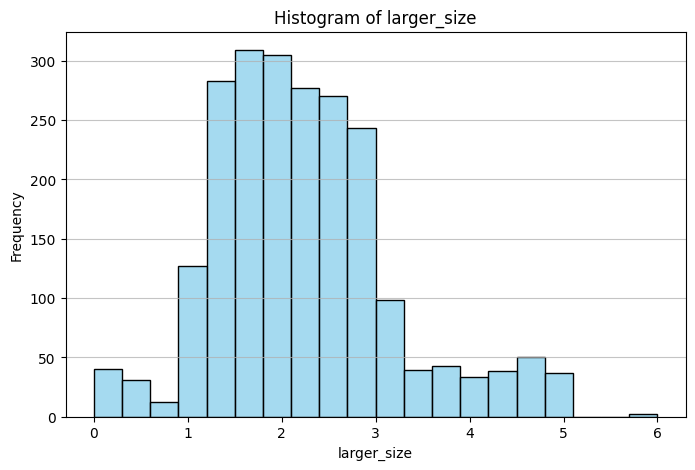

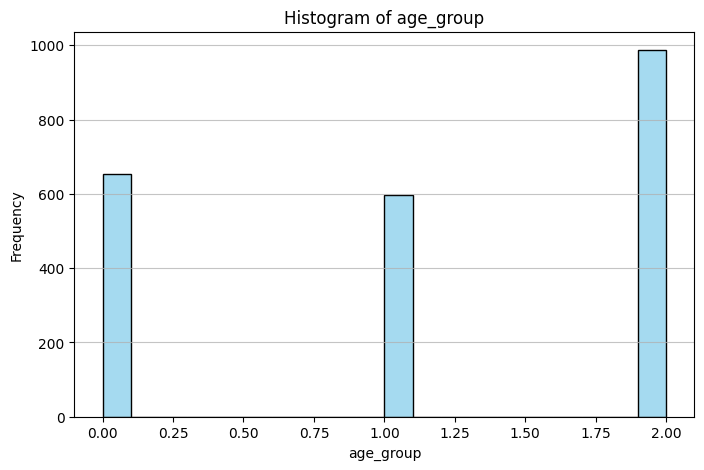

In [9]:
# Plot histograms for specific numerical variables
for column in ['larger_size', 'age_group']:
    if column in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data, x=column, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(axis='y', alpha=0.75)
        plt.show()


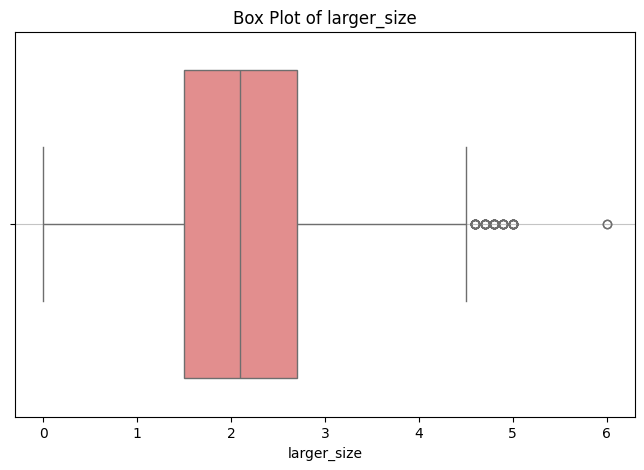

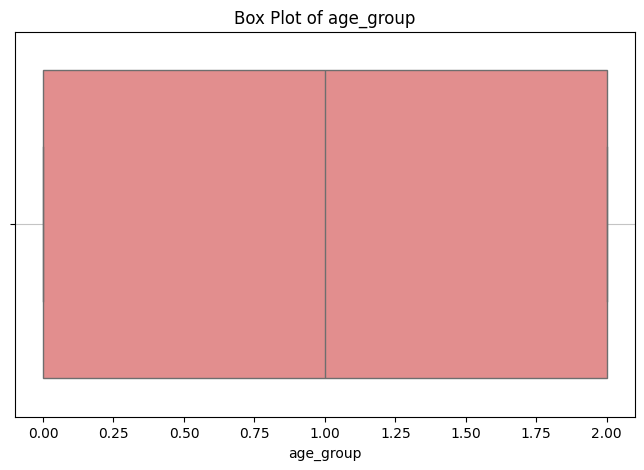

In [10]:
# Plot box plots for specific numerical variables to identify outliers
for column in ['larger_size', 'age_group']:
    if column in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x=column, color='lightcoral')
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.grid(axis='y', alpha=0.75)
        plt.show()

##Outlier Treatment

In [11]:
# Calculate the IQR for the 'larger_size' column
Q1 = data['larger_size'].quantile(0.25)  # 25th percentile
Q3 = data['larger_size'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = data[(data['larger_size'] >= lower_bound) & (data['larger_size'] <= upper_bound)]

# Display the number of rows removed
removed_rows = len(data) - len(filtered_data)
print(f"Number of rows removed: {removed_rows}")

Number of rows removed: 67


In [12]:
# Select categorical variables
categorical_columns = data.select_dtypes(include=['object'])

# Print categorical variables
print("Categorical Variables:")
print(categorical_columns.head())

Categorical Variables:
  localization tobacco_use alcohol_consumption sun_exposure gender skin_color  \
0       Tongue         Yes                  No           No      M      Black   
1       Tongue         Yes                  No           No      M      Black   
2       Tongue         Yes              Former          Yes      M      White   
3       Tongue         Yes              Former          Yes      M      White   
4          Lip      Former                 Yes          Yes      F      White   

  cancer_or_non_cancer  
0               Cancer  
1               Cancer  
2               Cancer  
3               Cancer  
4               Cancer  


In [13]:
# Print unique values for each column
print("Unique Values in Each Column:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("----")

Unique Values in Each Column:
Column: public_id
Unique Values: [   0    1    2 ... 2234 2235 2236]
----
Column: lesion_id
Unique Values: [ 50  41  87 103 101  54 129  11  22  68  58  77 102  33  96  84 106  53
  88 130  15  64 104  24  73  31  30  42   6  27  78  18  83  74  95  62
  56  59   1  47  45  85  67  23 107  80  94  90   0  32  51  12  36  86
  72  89  26  91  57  38  70  75 131  52  20  98  37 123 124 190 191 192
 193 194 195 215 216  93  49  55  40  65  66  97  44  76  34  43  99  81
  61  79  60  39  35  69  48  82  63  46  71  92   5  16  29  14  25   8
  13   2  28   7  19   4  10 100   3   9  17  21]
----
Column: patient_id
Unique Values: [ 48  39  81  78  14  52  24  10  20  63  55  71  31  90  51  82  13  60
  22  67  28  27  40   6  25  72  16  77  68  89  58  53  56   1  45  43
  79  62  21  29  74  88  84   0  30  49  11  34  80  66  83  85  54  36
  65  69  12  50  18  92  35 108 160 161 162 163 164 165 183  38  37  47
  32  46  59  57  26  44  41  42  23  33  70

##Data Preprocessing

In [14]:
# Handle missing values
data.isnull().sum()

,0
public_id,0
lesion_id,0
patient_id,0
localization,0
larger_size,0
tobacco_use,0
alcohol_consumption,0
sun_exposure,0
gender,0
skin_color,0


In [15]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows before removal: {data.duplicated().sum()}")


Number of duplicate rows before removal: 0


Data Encoding

In [16]:
# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'cancer_or_non_cancer':
        print(f"Column: {column}")
        print(f"Unique values before encoding: {data[column].unique()}")

        # Apply LabelEncoder
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

        print(f"Unique values after encoding: {data[column].unique()}")
        print("-")

Column: localization
Unique values before encoding: ['Tongue' 'Lip' 'Floor of mouth' 'Buccal mucosa' 'Palate' 'Gingiva'
 'Cheek' 'Gum' 'Buccal Mucosa']
Unique values after encoding: [8 6 3 1 7 4 2 5 0]
-
Column: tobacco_use
Unique values before encoding: ['Yes' 'Former' 'No' 'Not informed']
Unique values after encoding: [3 0 1 2]
-
Column: alcohol_consumption
Unique values before encoding: ['No' 'Former' 'Yes' 'Not informed']
Unique values after encoding: [1 0 3 2]
-
Column: sun_exposure
Unique values before encoding: ['No' 'Yes' 'Not informed']
Unique values after encoding: [0 2 1]
-
Column: gender
Unique values before encoding: ['M' 'F']
Unique values after encoding: [1 0]
-
Column: skin_color
Unique values before encoding: ['Black' 'White' 'Not informed' 'Brown' 'Asian' 'Hispanic']
Unique values after encoding: [1 5 4 2 0 3]
-


In [17]:
# Map target variable to binary
data['cancer_or_non_cancer'] = data['cancer_or_non_cancer'].map({'Cancer': 1, 'Non-Cancer': 0})

In [18]:
#Analyze Target Imbalance
target_column = 'cancer_or_non_cancer'
print("\nTarget value distribution:")
print(data[target_column].value_counts())



Target value distribution:
cancer_or_non_cancer
0    1633
1     604
Name: count, dtype: int64


<Axes: xlabel='cancer_or_non_cancer'>

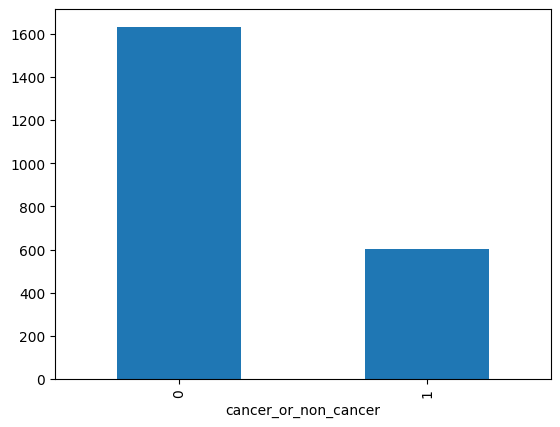

In [19]:
data[target_column].value_counts().plot(kind='bar')

Handle the class imbalance

In [20]:
# Handle class imbalance using SMOTE
X = data.drop(columns=[target_column])
y = data[target_column]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
cancer_or_non_cancer
1    1633
0    1633
Name: count, dtype: int64


<Axes: xlabel='cancer_or_non_cancer'>

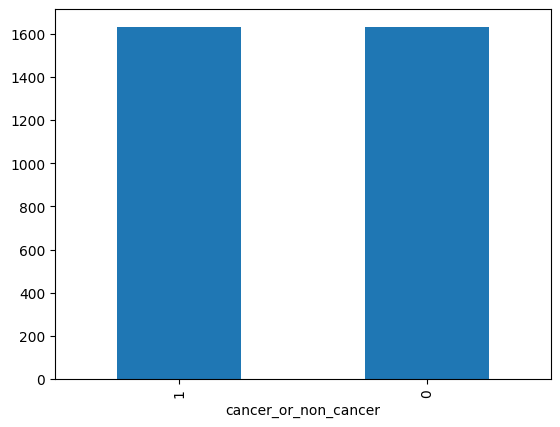

In [21]:
 pd.Series(y_resampled).value_counts().plot(kind='bar')

##Correlational Analysis

In [22]:
#Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['cancer_or_non_cancer'].sort_values(ascending=False)
print(correlation_with_target)


Correlation Analysis:
cancer_or_non_cancer    1.000000
localization            0.068836
skin_color              0.017312
gender                  0.014332
age_group               0.012920
sun_exposure            0.009561
alcohol_consumption     0.008785
tobacco_use            -0.005747
larger_size            -0.010883
lesion_id              -0.016488
patient_id             -0.043370
public_id              -0.174845
Name: cancer_or_non_cancer, dtype: float64


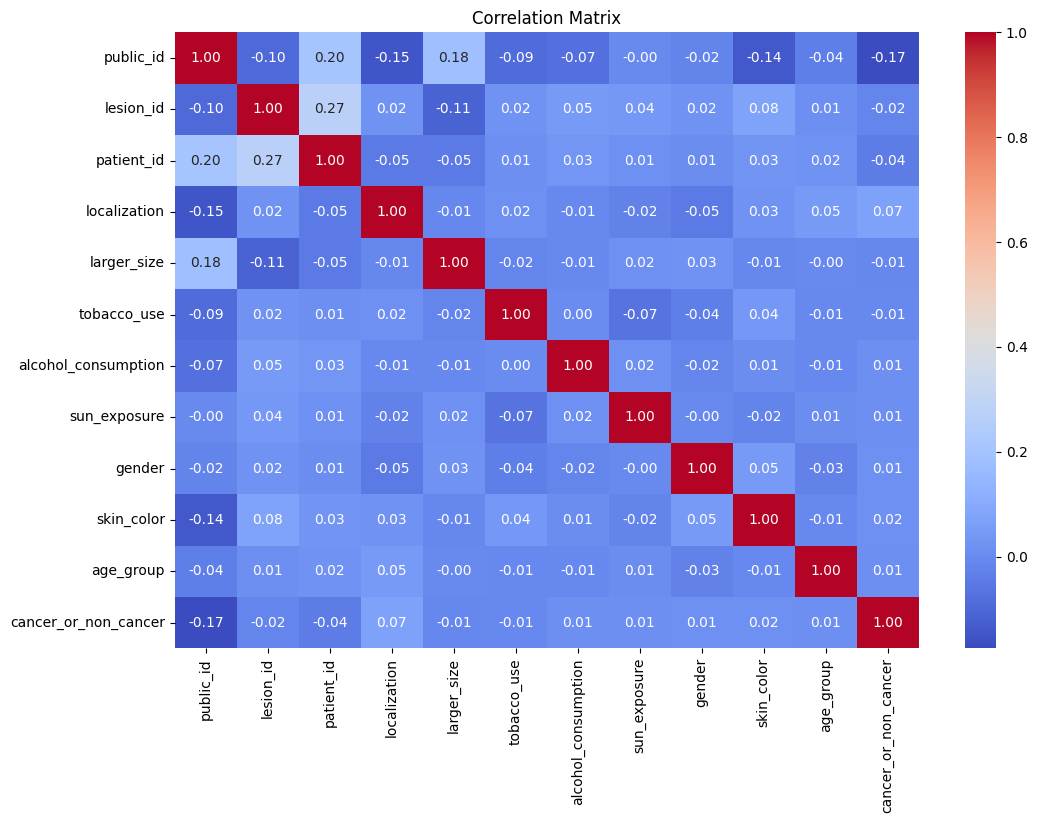

In [23]:
# Visualize correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##Feature Selection

In [24]:
# Remove unnecessary features based on correlation and domain knowledge
columns_to_drop = ['patient_id', 'public_id', 'lesion_id']  # Irrelevant for prediction
print(f"\nDropping columns: {columns_to_drop}")
data = data.drop(columns=columns_to_drop)


Dropping columns: ['patient_id', 'public_id', 'lesion_id']


Split the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2286
Test set size: 980


##Feature Scaling

In [26]:
# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:", numerical_cols)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])


Numerical columns: Index(['public_id', 'lesion_id', 'patient_id', 'localization', 'larger_size',
       'tobacco_use', 'alcohol_consumption', 'sun_exposure', 'gender',
       'skin_color', 'age_group'],
      dtype='object')


##Logistic Regression

In [27]:
##MOdel Training
##Logistic Regression

model=LogisticRegression()

In [28]:
##Training the logisticRegression model using training data
model.fit(X_resampled,y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#cross validation for training data
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_resampled,y_resampled,cv=10)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
#Accuracy on the training data
X_train_prediction=model.predict(X_resampled)
training_data_accuracy=accuracy_score(X_train_prediction,y_resampled)

In [31]:
print("Accuracy on training data:",training_data_accuracy)
print("ROC-AUC score in training data:")

Accuracy on training data: 0.6139007960808328
ROC-AUC score in training data:


In [32]:
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [33]:
print('Accuracy on testing data:',test_data_accuracy)

Accuracy on testing data: 0.6030612244897959


In [34]:
#Clarification report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       477
           1       0.62      0.60      0.61       503

    accuracy                           0.60       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.60      0.60      0.60       980



In [35]:
import shap

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


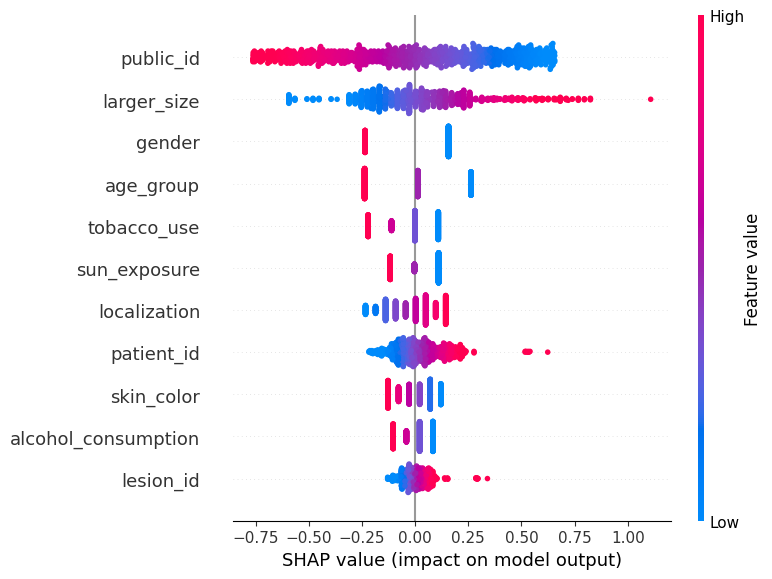

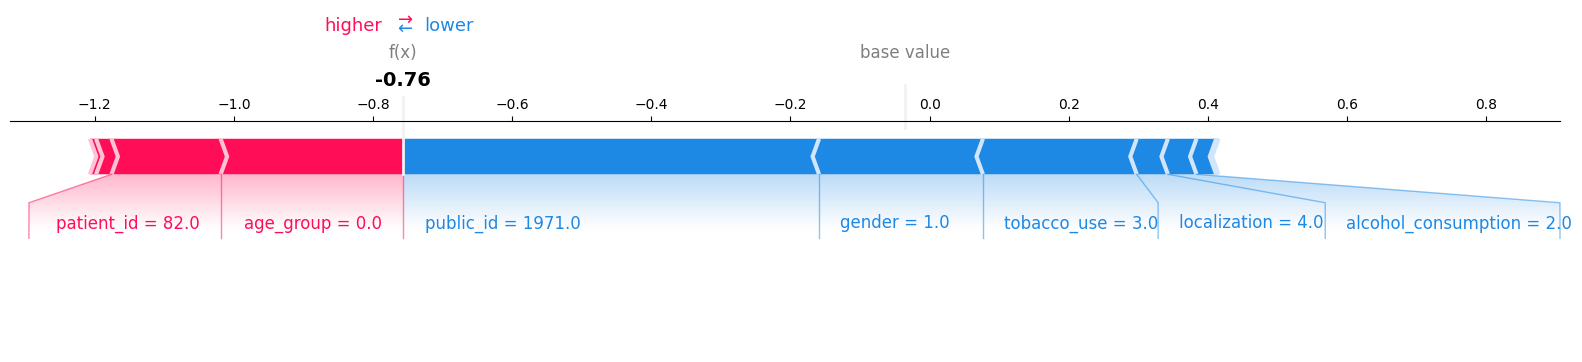

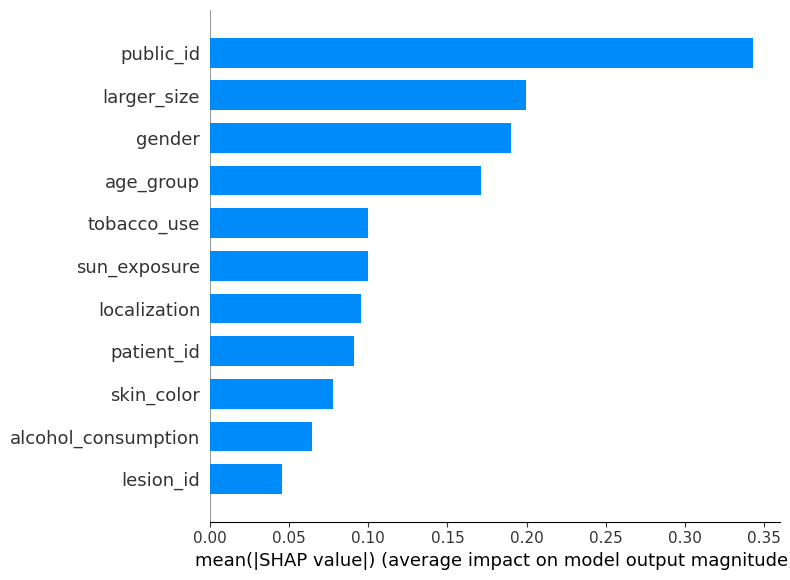

In [36]:
# Initialize SHAP explainer
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize feature importance (summary plot)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Visualize SHAP values for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)

# Feature importance bar plot
plt.figure(figsize=(5, 5))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")

In [37]:
!pip install lime
import lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0219e357cf565c77e652c3939e0dad0993a16629e5f964b8a66fbf9a2636c42e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [38]:
from lime.lime_tabular import LimeTabularExplainer

In [39]:
# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Convert X_train to NumPy array using .values
    feature_names=X.columns,
    class_names=['Non-Cancer', 'Cancer'],
    mode='classification'
)

# Explain a single prediction
sample_index = 0  # Index of the test sample to explain
# Get the actual data for the sample using .iloc
sample_data = X_test.iloc[sample_index]

# Convert the sample data to a NumPy array
sample_data_array = sample_data.values.reshape(1, -1)

# Generate LIME explanation
explanation = explainer.explain_instance(
    data_row=sample_data_array[0],
    predict_fn=model.predict_proba
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True)

# Save the explanation as an HTML file (optional)
explanation.save_to_file("lime_explanation_logistic_regression.html")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
#Building a predictive System
input_data=([0,50,48,8,0.3,3,1,0,1,1,2])

# change the input data into a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print("The person does not prone to oral cancer")
else:
  print("The person prone to oral cancer")

[0]
The person prone to oral cancer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

#Building the model
randomforest_classifier=RandomForestClassifier(n_estimators=100)
score=cross_val_score(randomforest_classifier,X_resampled,y_resampled,cv=10)




In [43]:
print(score)

[0.39143731 0.17737003 0.13455657 0.26911315 0.48012232 0.49541284
 0.53067485 0.80674847 0.90184049 0.48773006]


In [44]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,150,200], 'max_depth':[10,20,30,40]
}

grid_search = GridSearchCV(estimator=randomforest_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 150, 200]})

In [45]:
#Accuracy of the training data
randomforest_classifier.fit(X_resampled,y_resampled)
X_train_prediction_1=randomforest_classifier.predict(X_resampled)
print(accuracy_score(X_train_prediction_1,y_resampled))

1.0


In [46]:
#Accuracy of the testing data
X_test_prediction_1=randomforest_classifier.predict(X_test)
print(accuracy_score(X_test_prediction,y_test))


0.6030612244897959
ROC-AUC score for testing data: 


In [47]:
#Clarification report
print(classification_report(y_test,X_test_prediction_1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00       503

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



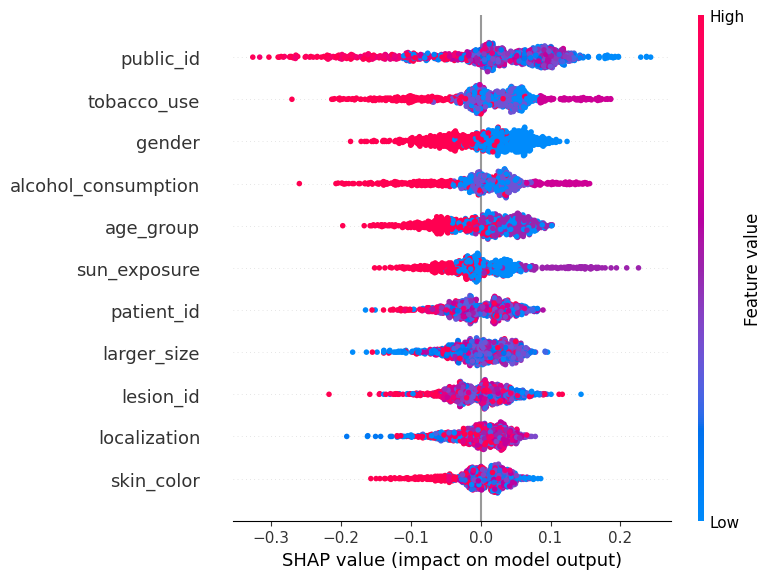

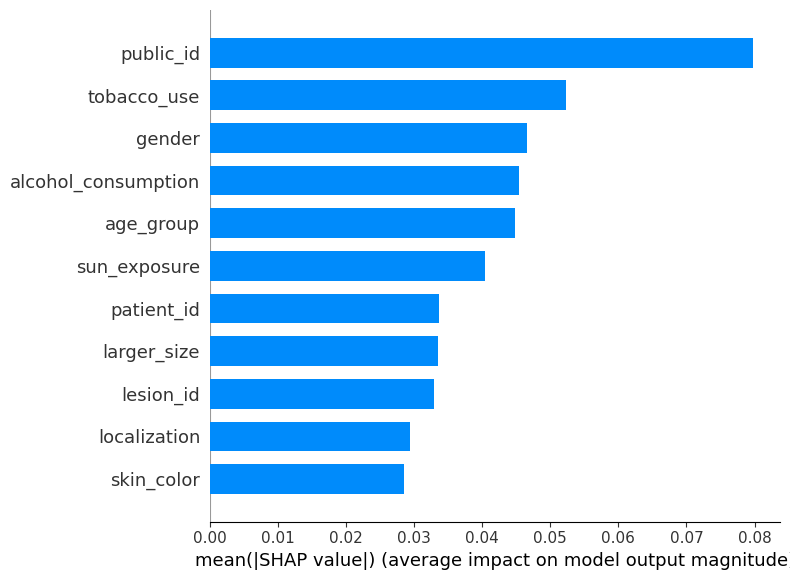

In [52]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(randomforest_classifier)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Select SHAP values for the desired class
shap_values_class1 = shap_values[:, :, 1] # Assuming you want to visualize for class 1

# Visualize feature importance as a summary plot
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns)

# Visualize feature importance as a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns, plot_type="bar")

In [49]:
#Building a predictive system
input_data_1=([8,103,78,8,0.06,1,3,0,0,5,1])

#change the input data into a numpy array
input_data_1_as_numpy_array=np.asarray(input_data_1)

#reshape the numpy array as we are predicting for only one instance
input_data_1_reshaped=input_data_1_as_numpy_array.reshape(1,-1)

prediction=randomforest_classifier.predict(input_data_1_reshaped)
print(prediction)

if(prediction[0]==1):
  print("The person does not prone to oral cancer")
else:
  print("The person prone to oral cancer")

[0]
The person prone to oral cancer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##LightGBM Model

In [51]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# Initialize LightGBM model
lgb_model = LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Evaluate on Test Data
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nLightGBM Classification Report on Test Data:")
print(classification_report(y_test, y_pred_lgb))
print(f"LightGBM ROC-AUC Score on Test Data: {roc_auc_score(y_test, y_prob_lgb):.2f}")

# Evaluate on Training Data
y_train_pred_lgb = lgb_model.predict(X_train_scaled)
y_train_prob_lgb = lgb_model.predict_proba(X_train_scaled)[:, 1]

print("\nLightGBM Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_lgb))
print(f"LightGBM ROC-AUC Score on Training Data: {roc_auc_score(y_train, y_train_prob_lgb):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1130, number of negative: 1156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494313 -> initscore=-0.022748
[LightGBM] [Info] Start training from score -0.022748

LightGBM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       477
           1       0.77      0.78      0.78       503

    accuracy                           0.77       980
   macro avg       0.77      0.77      0.77       980
weighted avg       0.77      0.77      0.77       980

LightGBM ROC-AUC Score on Test Data: 0.87

LightGBM Classification Report

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
